<a href="https://colab.research.google.com/github/sadoky/inteligencia-_articial_ELECT/blob/main/Overfitting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler






#[dataset['AirTemp'].iloc[0:8700]]

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


In [ ]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:8700])
set_validacion1 = dataset["Ghi"].iloc[8700:10000]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [ ]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

In [ ]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(GRU(units=na, input_shape=dim_entrada))

In [ ]:
modelo.add(Dense(units=dim_salida))

In [ ]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

In [ ]:
history=modelo.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=1)


Epoch 1/20
270/270 [==============================] - 6s 21ms/step - loss: 1.6488e-04
Epoch 2/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6328e-04
Epoch 3/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6667e-04
Epoch 4/20
270/270 [==============================] - 5s 20ms/step - loss: 1.6159e-04
Epoch 5/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6505e-04
Epoch 6/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6282e-04
Epoch 7/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6300e-04
Epoch 8/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6362e-04
Epoch 9/20
270/270 [==============================] - 5s 19ms/step - loss: 1.6899e-04
Epoch 10/20
270/270 [==============================] - 5s 19ms/step - loss: 1.7748e-04
Epoch 11/20
270/270 [==============================] - 5s 20ms/step - loss: 1.6343e-04
Epoch 12/20
270/270 [==============================]

(0.0, 0.007)

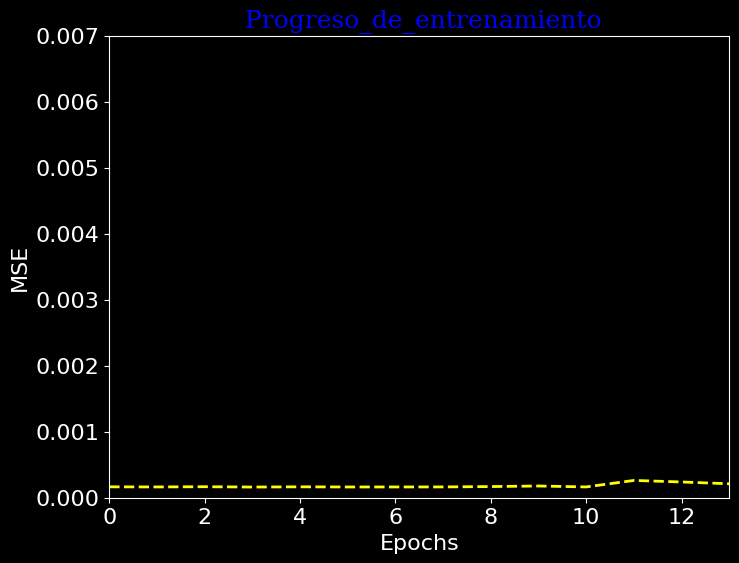

In [ ]:
loss=history.history['loss']
x=np.arange(0,20,1)


font1 = {'family':'serif','color':'blue','size':18}

plt.figure(figsize=(8,6))                      
plt.title(" Progreso_de_entrenamiento",fontdict=font1)
plt.plot(x,loss,'--',linewidth='2',color='yellow')
plt.style.use('dark_background')
plt.rcParams['font.size'] = 16
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.xlim(0,13)
plt.ylim(0,0.007)

In [ ]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [ ]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)


39/39 [==============================] - 1s 11ms/step


In [ ]:
prediccion2


,0
0,3.536102
1,3.536102
2,3.536102
3,3.536102
4,3.536102
...,...
1235,885.590637
1236,879.842529
1237,776.293030
1238,740.606323


In [ ]:
xaxis=np.arange(start=0,stop=43500,step=5)



In [ ]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
datos_train=df["Ghi"].iloc[0:8700]
datos_val=df["Ghi"].iloc[8700:10000]

datos_val


8700      0
8701      0
8702      0
8703      0
8704      0
       ... 
9995    891
9996    852
9997    779
9998    772
9999    809
Name: Ghi, Length: 1300, dtype: int64

In [ ]:
from numpy.matrixlib.defmatrix import concatenate

j=np.zeros(8755,int)
pred44=pd.DataFrame(j)
pred56=np.asarray(prediccion2,dtype=np.float64)

pred56=pred56.reshape(-1,1)
pred57=j.reshape(-1,1)
pred56





array([[  3.53610229],
       [  3.53610229],
       [  3.53610229],
       ...,
       [776.29302979],
       [740.60632324],
       [808.48736572]])

In [ ]:
lim=np.concatenate((pred57,pred56))
lim
lim2=pd.DataFrame(lim)
prediccion_final=lim2[8700:]

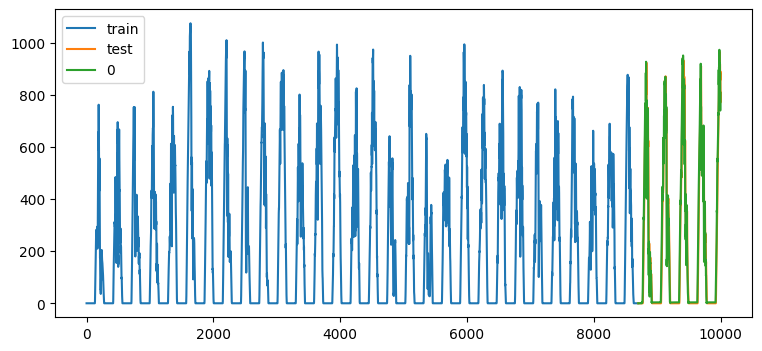

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict2")

ax.legend();

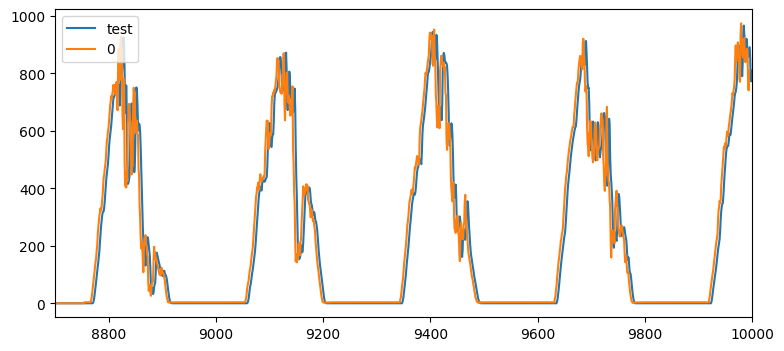

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
#datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
lim2.plot(ax=ax, label='predict')
plt.xlim(8700,10000)
ax.legend();



